In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

In [2]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd 
import os

In [3]:
# Files to load
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

In [4]:
#Files to open and read    
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
ride_data_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [7]:
# Get the columns and the rows that are not null in City.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# Get the columns and rows that are not null in City. 
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the data types of each column. 
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Get the unique values of the type of city. 
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# Get the number of data points from the Urban cities. 
sum(city_data_df["type"]=="Rural")
# Urban = 66, Suburban = 36, Rural = 18

18

In [12]:
# Get the columns and rows that are not null in ride data.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#Get the data type of ride_data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single datasheet
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Create a DataFrame for each type of city. Create Data Series for each type if city

In [16]:
# Create the Urban City DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Suburban and Rural City DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


### To get the number of rides per city by city type, create a Series with city name as index and # of ride
### as column. We will use groupby()

In [18]:
# Get the number of rides for urban cities. 
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Get the suburban rides data
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
# Get the rural ride data
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

### Get avergae fare for each city type. We will groupby and chain with mean

In [21]:
# Get average fare for each city in the urban cities. 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
# Get the average fare for each city in suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [23]:
# Get the average fare for each rural city
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

### Get the average number of drivers per each city type

In [24]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [25]:
# Get average number of drivers for each suburban and rural city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [26]:
### Create the Bubble Chart for Urban, Suburban and Rural cities.
#### Looking for fare as a function of number of rides per city.

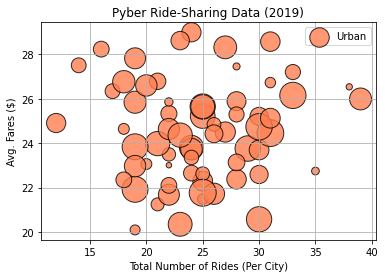

In [27]:
# Build the scatter plots of urban cities. 
plt.scatter(urban_ride_count, urban_avg_fare,
           s = 10*urban_driver_count, c="coral",
           edgecolor = "black", linewidths = 1, 
           alpha = 0.8, label = "Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avg. Fares ($)")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
# Add the legend
plt.legend()

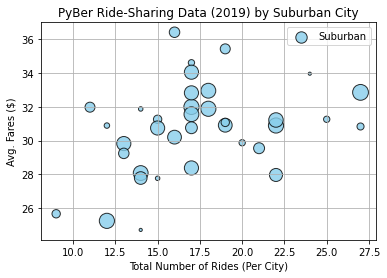

In [28]:
# Creat bubble chart for subruban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, 
           s = 10*suburban_driver_count, c = "skyblue", 
           edgecolor = "black", linewidths = 1,
           alpha = 0.8, label = "Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avg. Fares ($)")
plt.title("PyBer Ride-Sharing Data (2019) by Suburban City")
plt.grid(True)
plt.legend()

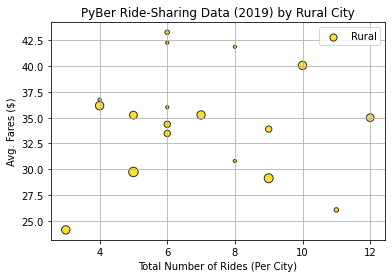

In [29]:
# Create bubble chart for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, 
           s = 10*rural_driver_count, c = "gold", 
           edgecolor = "black", linewidths = 1,
           alpha = 0.8, label = "Rural")
            
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avg. Fares ($)")
plt.title("PyBer Ride-Sharing Data (2019) by Rural City")
plt.grid(True)
plt.legend()

### Create a Bubble Chart for All the Cities

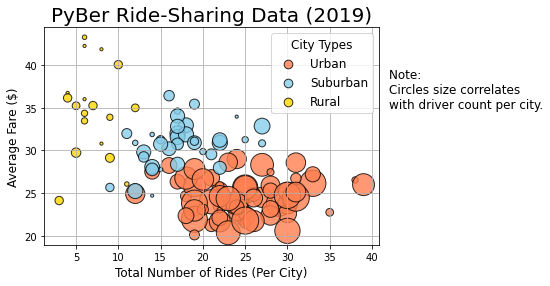

In [33]:
 # Add the scatter for each type of city. 
plt.scatter(urban_ride_count, 
           urban_avg_fare, 
           s=10*urban_driver_count, c = "coral", 
           edgecolor = "black", linewidths = 1, 
           alpha = 0.8, label = "Urban")

plt.scatter(suburban_ride_count, 
           suburban_avg_fare, 
           s = 10*suburban_driver_count, c = "skyblue", 
           edgecolor = "black", linewidths = 1, 
           alpha = 0.8, label = "Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, 
           s = 10*rural_driver_count, c = "gold", 
           edgecolor = "black", linewidths = 1,
           alpha = 0.8, label = "Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# Create legend of same size bubble.
lgnd = plt.legend(fontsize = "12", mode="Expanded",
        scatterpoints = 1, loc = 'best', title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#plt.legend()  #<<-- this will bypass the new legend size declared by lgnd.

# Incorporate a text label about circle size.
plt.text(42,35, "Note: \nCircles size correlates \nwith driver count per city.", fontsize = "12")

# Save the figure.
plt.savefig("analysis/Fig", bbox_inches="tight")

# Show the plot
plt.show()

### Three Different methods of getting the Descriptive Statistics.

#### Pandas 'DESCRIBE' method

In [ ]:
# Get summary statistics for URBAN cities. 
urban_cities_df.describe()

In [ ]:
# Get summary statistics for SUBURBAN cities
suburban_cities_df.describe()

In [ ]:
# Get summary statistics for RURAL cities
rural_cities_df.describe()

In [ ]:
# Get summary statistics of URBAN rides
urban_ride_count.describe()

In [ ]:
# Get summary statistics of SUBURBAN rides
suburban_ride_count.describe()

In [ ]:
# Get summary statistics of RURAL rides
rural_ride_count.describe()

#### Pandas MEAN(), MEDIAN(), AND MODE() method

In [ ]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

In [ ]:
# Calculate Median of the ride count for each city type.
round(urban_ride_count.median()), round(suburban_ride_count.median()), round(rural_ride_count.median())

In [ ]:
# Calcualte the MODE for each city type. 
round(urban_ride_count.mode()), round(suburban_ride_count.mode()), round(rural_ride_count.mode())

### NumPy mean(), median() Functions and SciPy mode() Function

In [ ]:
# Import NumPy and stats module for SciPy
import numpy as np
import scipy.stats as sts

In [ ]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for the urban trip is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

In [ ]:
# Calculate the mean, median and mode for suburban cities.

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trip is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trip is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for the suburban trip is {mode_suburban_ride_count}.")

In [ ]:
# Calculate the mean, median and mode for rural cities. 

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trip is {mean_rural_ride_count:.2f}")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trip is {median_rural_ride_count}." )

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}." )

### Summary Statistics for the Fare by City Type

In [ ]:
# Get the fares for the urban cities. 
urban_fares = urban_cities_df["fare"]
urban_fares.head()

In [ ]:
# Calcualte the measures of central tendency for the average fare for the URBAN cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is {mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trip is {median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trip is {mode_urban_fares}.")

In [ ]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the SUBURBAN cities. 
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trip is {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trip is {median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trip is {mode_suburban_fares}.")

In [ ]:
#citiesfares
rural_fares = rural_cities_df["fare"]
rural_fares.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the RURAL cities. 
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural city trip is {mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural city trip is {median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural city trip is {mode_rural_fares}.")

### Summary Statistics for the Number of Drivers by City Type

In [ ]:
# Get the driver count data from the urban cities. 
urban_driver_count = urban_cities_df["driver_count"]
urban_driver_count.head()

In [ ]:
# Calcualte the measures of central tendency for the average number of drivers for the URBAN cities
mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean for the number of drivers in urban cities is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_driver_count)
print(f"The median for the number of drivers in urban cities is {median_urban_driver_count:.2f}.")

mode_urban_driver_count = sts.mode(urban_driver_count)
print(f"The mode for the number of drivers in urban cities is {mode_urban_driver_count}.")

In [ ]:
# Get the driver count from the suburban cities. 
suburban_driver_count = suburban_cities_df["driver_count"]
suburban_driver_count.head()

In [ ]:
# Calcualte the measures of central tendency for the average number of drivers for the SUBURBAN cities
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean for the number of drivers in suburban cities is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median for the number of drivers in suburban cities is {median_suburban_driver_count:.2f}.")

mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f"The mode for the number of drivers in suburban cities is {mode_suburban_driver_count}.")

In [ ]:
# Get the driver count from the rural cities. 
rural_driver_count = rural_cities_df["driver_count"]
rural_driver_count.head()

In [ ]:
# Calcualte the measures of central tendency for the average number of drivers for the RURAL cities
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean for the number of drivers in rural cities is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_driver_count)
print(f"The median for the number of drivers in rural cities is {median_rural_driver_count:.2f}.")

mode_rural_driver_count = sts.mode(rural_driver_count)
print(f"The mode for the number of drivers in rural cities is {mode_rural_driver_count}.")

### Box-and-Whisker Plots for Ride Count Data

In [ ]:
# Create a box-and-whisker plot for the urban cities ride count. 
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)
# Add the title, y-axis label and grid. 
ax.set_title('Urban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()
plt.show()

In [ ]:
# Create a box-and-whisker plot for the suburban citites ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)
# Add the title, y-axis label and grid. 
ax.set_title('Suburban Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.grid()
plt.show()

In [ ]:
# Create a box-and-whisker plot for the rural citites ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)
# Add the title, y-axis label and grid. 
ax.set_title('Rural Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.grid()
plt.show()

### Put All the Box-and-Whisker plots together for Rider data

In [ ]:
# Add all the ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()
#Save the figure. 
plt.savefig("analysis/Fig2.png")
plt.show()



### Get the outlier city with #39 Rides out. 

In [ ]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

### Box-and-Whisker Plots for Ride Fare Data

In [ ]:
# Creat a box-and-Whisker plt for the URBAN fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)


# Add the title, y-axis label and grid. 
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [ ]:
# Creat a box-and-Whisker plt for the SUBURBAN fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)


# Add the title, y-axis label and grid. 
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

In [ ]:
# Creat a box-and-Whisker plt for the RURAL fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)


# Add the title, y-axis label and grid. 
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

### Put All the Box-and-Whisker Plots for Ride Fare Together

In [ ]:
# # Add all the Fare count box-and-whisker plots to the same graph.
# x_labels = ["Urban", "Suburban", "Rural"]
# fare_count_data = [urban_fare_count, suburban_fare_count, rural_fare_count]
# fig, ax = plt.subplots(figsize = (10, 6))
# ax.set_title('Ride Fare Data (2019)', fontsize = 20)
# ax.set_ylabel('Fares ($)', fontsize = 14)
# ax.set_xlabel('City Types', fontsize = 14)
# ax.boxplot(fare_count_data, labels = x_labels)
# ax.set_yticks(np.arange(0, 45, step = 3.0))
# ax.grid()
# #Save the figure. 
# plt.savefig("analysis/Fig3.png")
# plt.show()

### Get the Percrentage of Fares for Each City Type

In [ ]:
# Get the sum of the fares for each sity type. 
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

In [ ]:
# Get the sum of all the fares. 
total_fares = pyber_data_df["fare"].sum()
total_fares

In [ ]:
# Calculate the percentage of fare for each city type. 
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

In [ ]:
### Pie Chart for the Percentage of Fares by City Type

In [ ]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10,6))


# Build the percentage of fares by city type pie chart. 
plt.pie(type_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%', 
        shadow = True, startangle = 150)
plt.title('% of Total Fares by City Type')

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()

### Calculate Ride Percentage and plot a Pie chart

In [ ]:
# Get the sum of the rides for each sity type. 
sum_rides_by_type = pyber_data_df.groupby(["type"]).sum()["ride_id"]
sum_rides_by_type

In [ ]:
# Get the sum of all the fares. 
total_rides = pyber_data_df["ride_id"].sum()
total_rides

In [ ]:
# Calculate the percentage of fare for each city type. 
type_ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
type_ride_percents

### Pie Chart for the Percentage of Rides by City Type

In [ ]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10,6))


# Build the percentage of fares by city type pie chart. 
plt.pie(type_ride_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%', 
        shadow = True, startangle = 150)
plt.title('% of Total Rides by City Type')

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()

### Calcualte Driver Percentages

In [ ]:
# Get the sum of the driver for each sity type. 
sum_drivers_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

In [ ]:
# Get the sum of all the drivers. 
total_drivers = pyber_data_df["driver_count"].sum()
total_drivers

In [ ]:
# Calculate the percentage of drivers for each city type. 
type_driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
type_driver_percents

In [ ]:
# Build Pie Chart
plt.subplots(figsize=(10,6))


# Build the percentage of fares by city type pie chart. 
plt.pie(type_driver_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%', 
        shadow = True, startangle = 150)
plt.title('% of Total Drivers by City Type')

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()